# python-igraph

`igraph` 是一个高效的图论（网络）分析库，专门用于处理和分析大规模复杂网络

`cairocffi` 是用于绘制图形的依赖库, `pycairo` 是Cairo的官方Python绑定, 前者在 win 上安装的话需要额外到官网装一下本体, 后者则无需考量此问题(mac上反之)

```bash
# for win
poetry add python-igraph pycairo -vvv
# for mac
poetry add python-igraph cairocffi -vvv
```

例如

图包含 3 个节点和 2 条边
图形已保存为: domain_graph_example.png


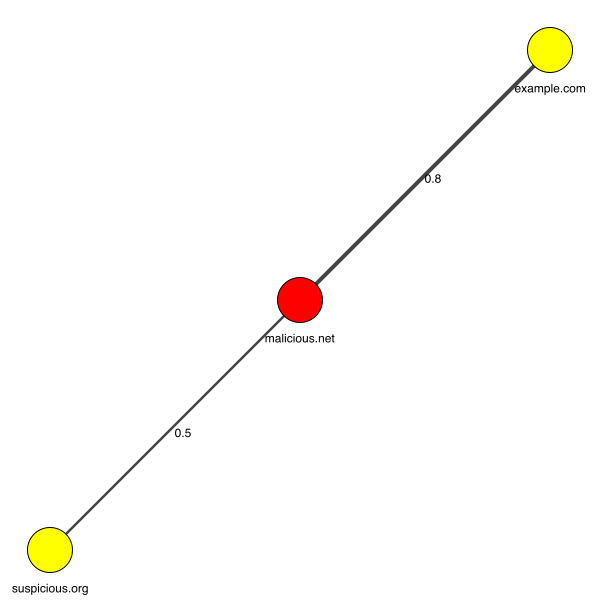

图形已显示在notebook中


In [ ]:
import igraph as ig
from pathlib import Path

# 创建图
g = ig.Graph()

# 添加节点
g.add_vertices(3)

# 添加边
g.add_edges([(0, 1), (1, 2)])

# 设置节点属性
g.vs["name"] = ["example.com", "malicious.net", "suspicious.org"]
g.vs["type"] = ["grey", "black", "grey"]

# 设置边权重
g.es["weight"] = [0.8, 0.5]

# 设置节点颜色(根据类型)
color_dict = {"grey": "yellow", "black": "red"}
g.vs["color"] = [color_dict[type] for type in g.vs["type"]]

# 设置边的宽度(根据权重)
g.es["width"] = [weight * 5 for weight in g.es["weight"]]

# 输出图的基本信息
print(f"图包含 {len(g.vs)} 个节点和 {len(g.es)} 条边")

# 使用igraph自带绘图功能
visual_style = {
 "vertex_size": 45, # 节点大小
 "vertex_label": g.vs["name"], # 节点标签
 "vertex_label_dist": 1.5, # 标签距离节点的距离
 "vertex_label_size": 12, # 标签字体大小
 "vertex_color": g.vs["color"], # 节点颜色
 "edge_width": g.es["width"], # 边的宽度
 "edge_label": [f"{w:.1f}" for w in g.es["weight"]], # 边的标签
 "layout": g.layout("kk"),  # Kamada-Kawai布局算法
 "bbox": (600, 600), # 图像的边界框大小(宽度, 高度)(单位: 像素)
 "margin": 50, # 图像的边距
}

# 绘制并保存图像
OUTFILEPATH = "domain_graph_example.png"
# ig.plot(g, OUTFILEPATH, **visual_style)
# fig = ig.plot(g, **visual_style)
fig = ig.plot(g, OUTFILEPATH, **visual_style)
print("图形已保存为: domain_graph_example.png")
display(fig)
print("图形已显示在notebook中")